# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis
from cdlib import algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [2]:
# Importing relationships data frame
Path = r"D:\Data_Analysis\13-11-2025_Network_Visualization\03.Scripts\20th-century"
df_relationships = pd.read_pickle(os.path.join(Path, 'country_relationships.pkl'))
df_relationships.head()

,source,target,Interactions
0,Austria,France,6
1,Austria,Hungary,6
2,Hungary,Russia,5
3,Germany,Russia,21
4,Germany,Ukraine,16


# Visualizations

## Static Networkx Graph

In [3]:
# Creating a network object
G = nx.from_pandas_edgelist(df_relationships, source='source', target='target',
                            edge_attr='Interactions', create_using=nx.Graph())
G

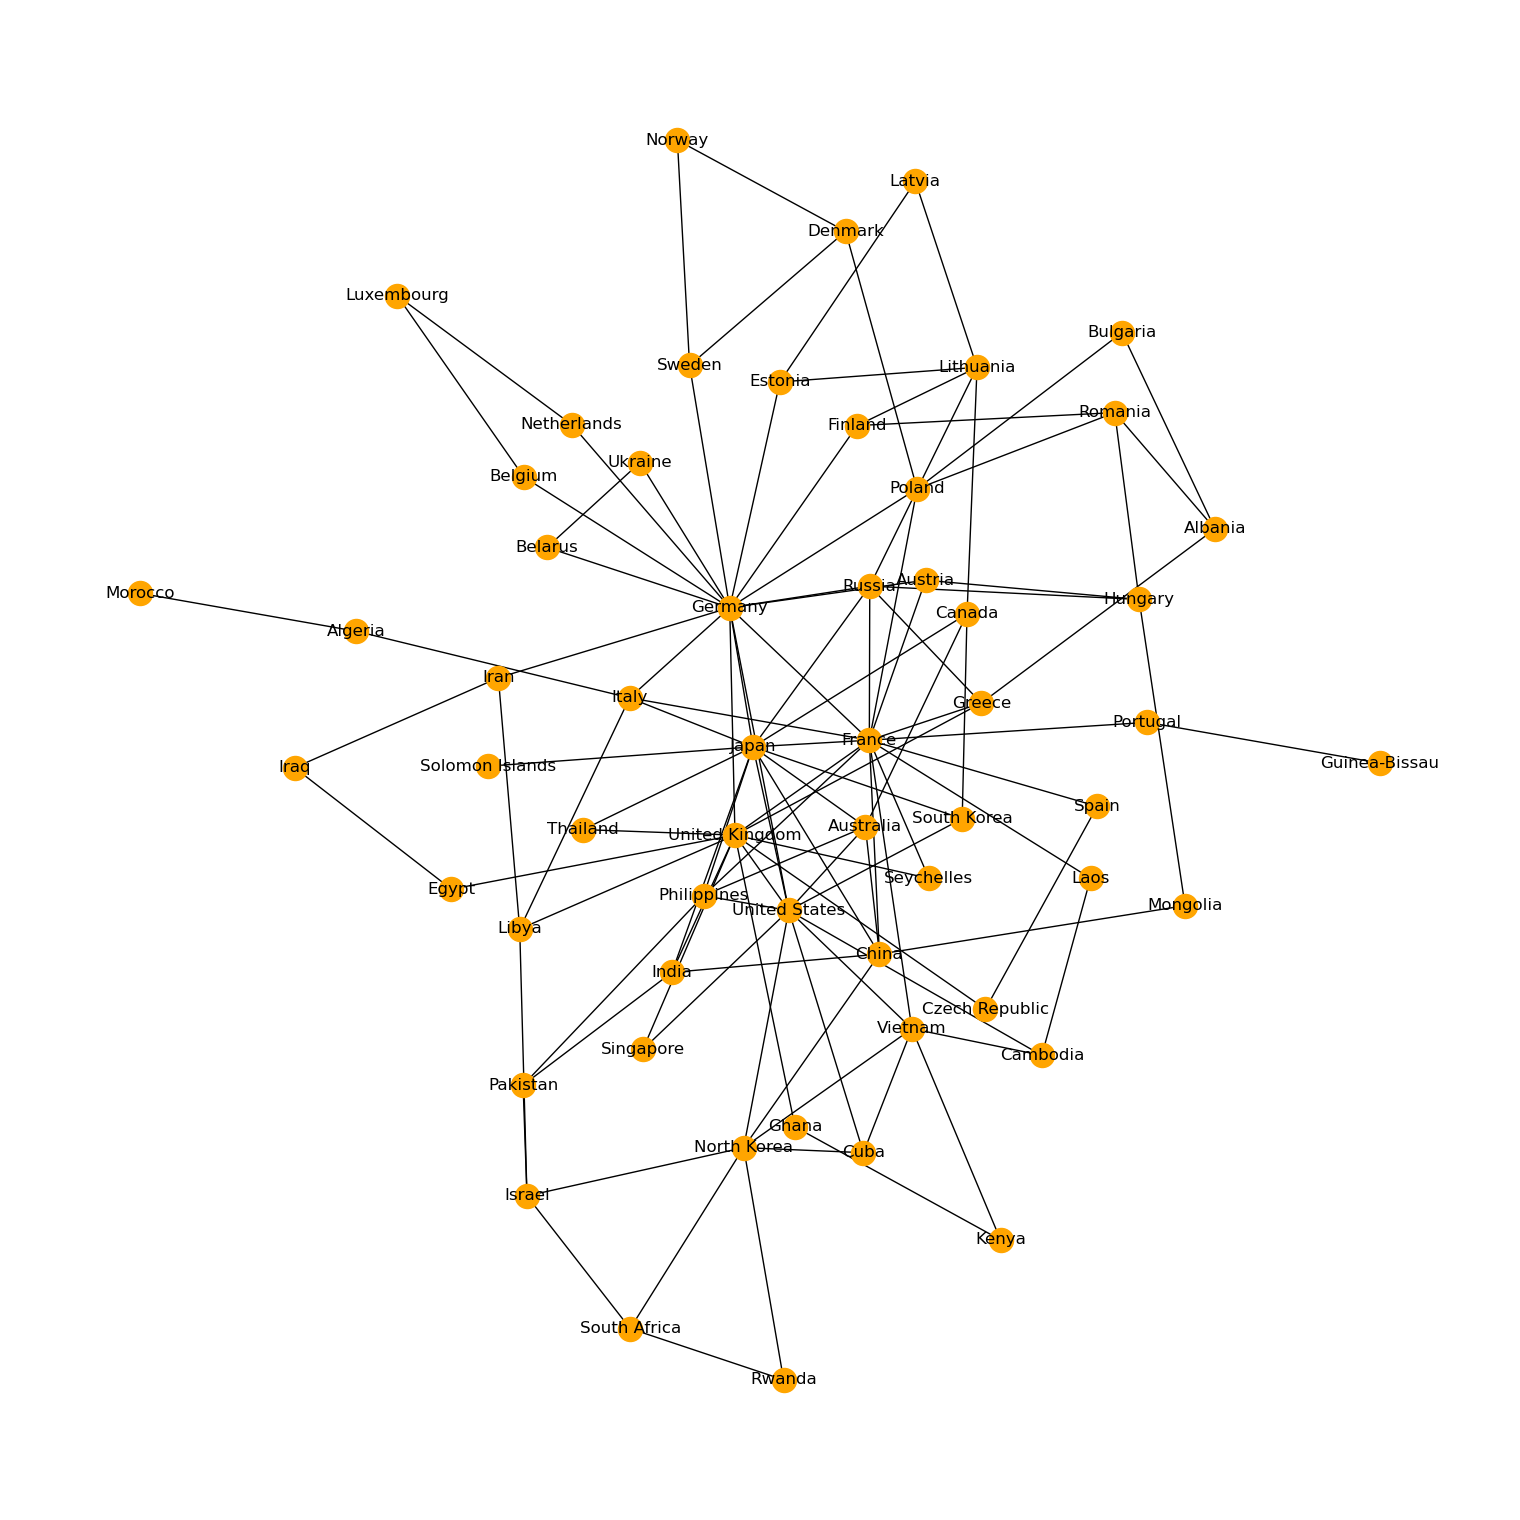

In [4]:
# Creating static network graph
undirectedG = plt.figure(figsize=(15, 15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='orange', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

## Interactive Network Graph

In [5]:
# Defining net object
net = Network()
net = Network(notebook=True, width='1300px', height='1000px', bgcolor='#222222', font_color='white')

# Defining nodes from the G object
node_degree = dict(G.degree)
node_degree.items()

dict_items([('Austria', 3), ('France', 15), ('Hungary', 4), ('Russia', 6), ('Germany', 16), ('Ukraine', 2), ('United States', 11), ('United Kingdom', 12), ('Italy', 5), ('Czech Republic', 2), ('Spain', 2), ('Poland', 5), ('Estonia', 3), ('Latvia', 2), ('Lithuania', 5), ('Finland', 3), ('Denmark', 3), ('Norway', 2), ('Sweden', 3), ('Netherlands', 2), ('Luxembourg', 2), ('Belgium', 2), ('Greece', 4), ('Albania', 3), ('Belarus', 2), ('Libya', 4), ('Egypt', 2), ('Iraq', 2), ('Iran', 3), ('Japan', 13), ('Algeria', 2), ('Morocco', 1), ('China', 6), ('Thailand', 2), ('Singapore', 2), ('Philippines', 5), ('Australia', 5), ('Solomon Islands', 1), ('India', 4), ('Pakistan', 3), ('Israel', 4), ('North Korea', 7), ('South Africa', 3), ('Laos', 2), ('Cambodia', 3), ('Vietnam', 6), ('Kenya', 2), ('Ghana', 2), ('Seychelles', 2), ('Portugal', 2), ('Guinea-Bissau', 1), ('Romania', 4), ('Bulgaria', 2), ('Mongolia', 2), ('Cuba', 3), ('South Korea', 3), ('Canada', 4), ('Rwanda', 2)])

In [6]:
# Defining node size attributes and creating graph with filter options
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_=True)
net.repulsion()

# Saving file as html file
net.show('20th_Century_Countries.html')

20th_Century_Countries.html


Both the static and interactive network graph rely on the number of interactions or edges to organize nodes. The positioning of country nodes seems to have been more effectively done by the Pyvis interactive graph as countries like Laos and South Africa have a clearer path that is easy to distinguish based on their mention in the 20th century article. The shortening of node distance done by the kamada_kawai_layout positioned countries to a similar distance as the positioning of the Leiden algorithm.

## Communities Network Graph

In [7]:
# Applying Leiden algorithm to G object
coms = algorithms.leiden(G)
new_com = coms.to_node_community_map()
new_com

defaultdict(list,
            {'Germany': [0],
             'Ukraine': [0],
             'Poland': [0],
             'Finland': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Albania': [0],
             'Belarus': [0],
             'Romania': [0],
             'Bulgaria': [0],
             'United States': [1],
             'Singapore': [1],
             'Israel': [1],
             'North Korea': [1],
             'South Africa': [1],
             'Laos': [1],
             'Cambodia': [1],
             'Vietnam': [1],
             'Kenya': [1],
             'Ghana': [1],
             'Cuba': [1],
             'Rwanda': [1],
             'Japan': [2],
             'China': [2],
             'Thailand': [2],
             'Philippines': [2],
             'Australia': [2],
             'Solomon Islands': [2],
             'India': [2],
     

In [8]:
# Turning new_com into a dictionary
dict_com = {k: v[0] for k, v in new_com.items()}
dict_com

{'Germany': 0,
 'Ukraine': 0,
 'Poland': 0,
 'Finland': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Belgium': 0,
 'Albania': 0,
 'Belarus': 0,
 'Romania': 0,
 'Bulgaria': 0,
 'United States': 1,
 'Singapore': 1,
 'Israel': 1,
 'North Korea': 1,
 'South Africa': 1,
 'Laos': 1,
 'Cambodia': 1,
 'Vietnam': 1,
 'Kenya': 1,
 'Ghana': 1,
 'Cuba': 1,
 'Rwanda': 1,
 'Japan': 2,
 'China': 2,
 'Thailand': 2,
 'Philippines': 2,
 'Australia': 2,
 'Solomon Islands': 2,
 'India': 2,
 'Pakistan': 2,
 'Mongolia': 2,
 'South Korea': 2,
 'Canada': 2,
 'Austria': 3,
 'France': 3,
 'Hungary': 3,
 'Russia': 3,
 'United Kingdom': 3,
 'Czech Republic': 3,
 'Spain': 3,
 'Greece': 3,
 'Seychelles': 3,
 'Portugal': 3,
 'Guinea-Bissau': 3,
 'Italy': 4,
 'Libya': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Iran': 4,
 'Algeria': 4,
 'Morocco': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5}

In [9]:
# Generating network graph with communities
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook=True, width='1300px', height='1000px', bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()

# Saving file as html file
com_net.show('20th_Century_Communities.html')

20th_Century_Communities.html


The community grouping rearranged the countries to appear at a more realistic distance from countries based on the proximity parameters of the relationships data frame causing countries such as Laos and Africa to appear with a shorter distance but kept a similar number of edges between them. This aligned the partition more to the article narrative. The algorithm seems to have organized countries based on their order and frequency of mention in the article narrative, which caused for countries such as Canada, Australia, and China to be grouped together into one community.

The orange colored edges connect countries involved in the expansion Germany had during the world war, the green edges connect countries related to Japan conflict development, the purpple edges connect countries relate to the United States intervention, the blue edges connect countries that were part of the allies and the red edges relate to countries that were recovered by the allies before the end of the war.

# Centrality Measures

## Degree Centrality

In [10]:
# Creating a degree centrality dictionary
degree_dict = nx.degree_centrality(G)
degree_dict

{'Austria': 0.05263157894736842,
 'France': 0.2631578947368421,
 'Hungary': 0.07017543859649122,
 'Russia': 0.10526315789473684,
 'Germany': 0.2807017543859649,
 'Ukraine': 0.03508771929824561,
 'United States': 0.19298245614035087,
 'United Kingdom': 0.21052631578947367,
 'Italy': 0.08771929824561403,
 'Czech Republic': 0.03508771929824561,
 'Spain': 0.03508771929824561,
 'Poland': 0.08771929824561403,
 'Estonia': 0.05263157894736842,
 'Latvia': 0.03508771929824561,
 'Lithuania': 0.08771929824561403,
 'Finland': 0.05263157894736842,
 'Denmark': 0.05263157894736842,
 'Norway': 0.03508771929824561,
 'Sweden': 0.05263157894736842,
 'Netherlands': 0.03508771929824561,
 'Luxembourg': 0.03508771929824561,
 'Belgium': 0.03508771929824561,
 'Greece': 0.07017543859649122,
 'Albania': 0.05263157894736842,
 'Belarus': 0.03508771929824561,
 'Libya': 0.07017543859649122,
 'Egypt': 0.03508771929824561,
 'Iraq': 0.03508771929824561,
 'Iran': 0.05263157894736842,
 'Japan': 0.22807017543859648,
 'Alge

In [11]:
# Converting dictionary to pandas data frame
df_degreeC = pd.DataFrame(degree_dict.items(), columns=['Countries', 'Centrality'])
df_degreeC.sort_values(by=['Centrality'], ascending=False, inplace=True)
df_degreeC.head()

,Countries,Centrality
4,Germany,0.280702
1,France,0.263158
29,Japan,0.228070
7,United Kingdom,0.210526
6,United States,0.192982


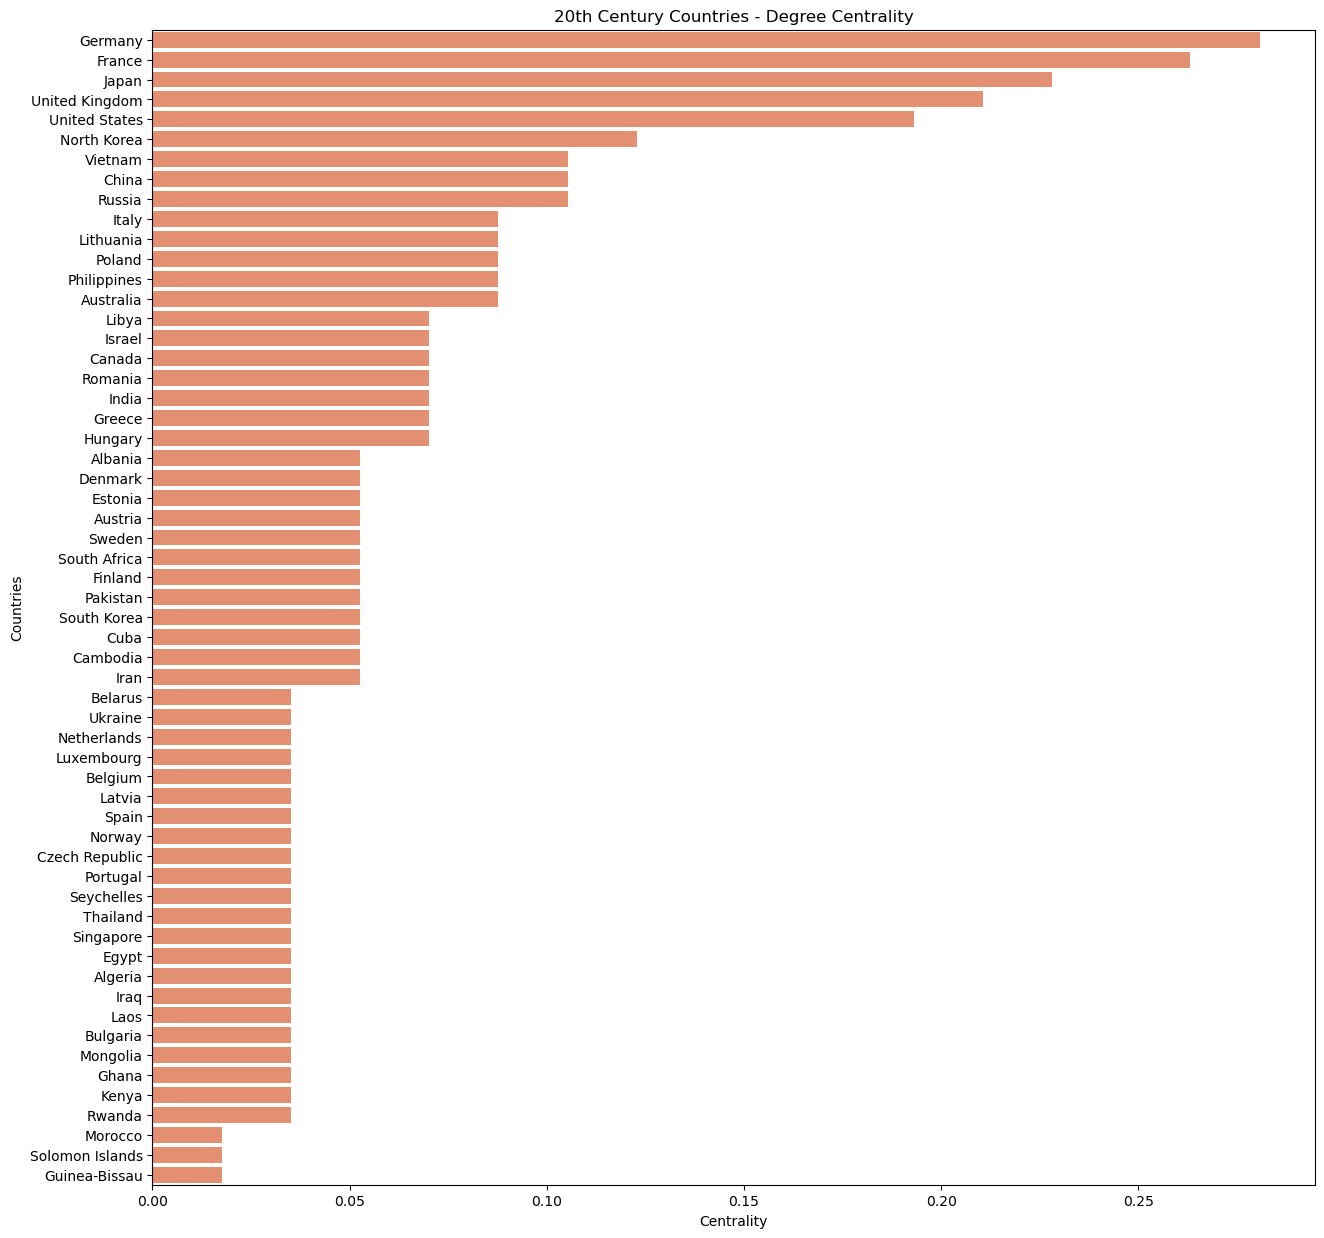

In [12]:
# Plotting the degree centrality
plt.figure(figsize=(15, 15))
with sns.color_palette('flare'):
    sns.barplot(data=df_degreeC, x='Centrality', y='Countries', saturation=0.9).set_title(
        '20th Century Countries - Degree Centrality')

From the bar chart it is evident that the countries with the most interactions were from Germany, France, Japan, United Kingdom. This coincides with the article narrative as these countries were located in the epicenter of the World War II conflict.

## Closeness Centrality

In [13]:
# Creating a closeness centrality data frame
closeness_dict = nx.closeness_centrality(G)
df_closenessC = pd.DataFrame(closeness_dict.items(), columns=['Countries', 'Centrality'])
df_closenessC.sort_values(by=['Centrality'], ascending=False, inplace=True)
df_closenessC.head()

,Countries,Centrality
1,France,0.532710
4,Germany,0.532710
29,Japan,0.483051
7,United Kingdom,0.478992
6,United States,0.471074


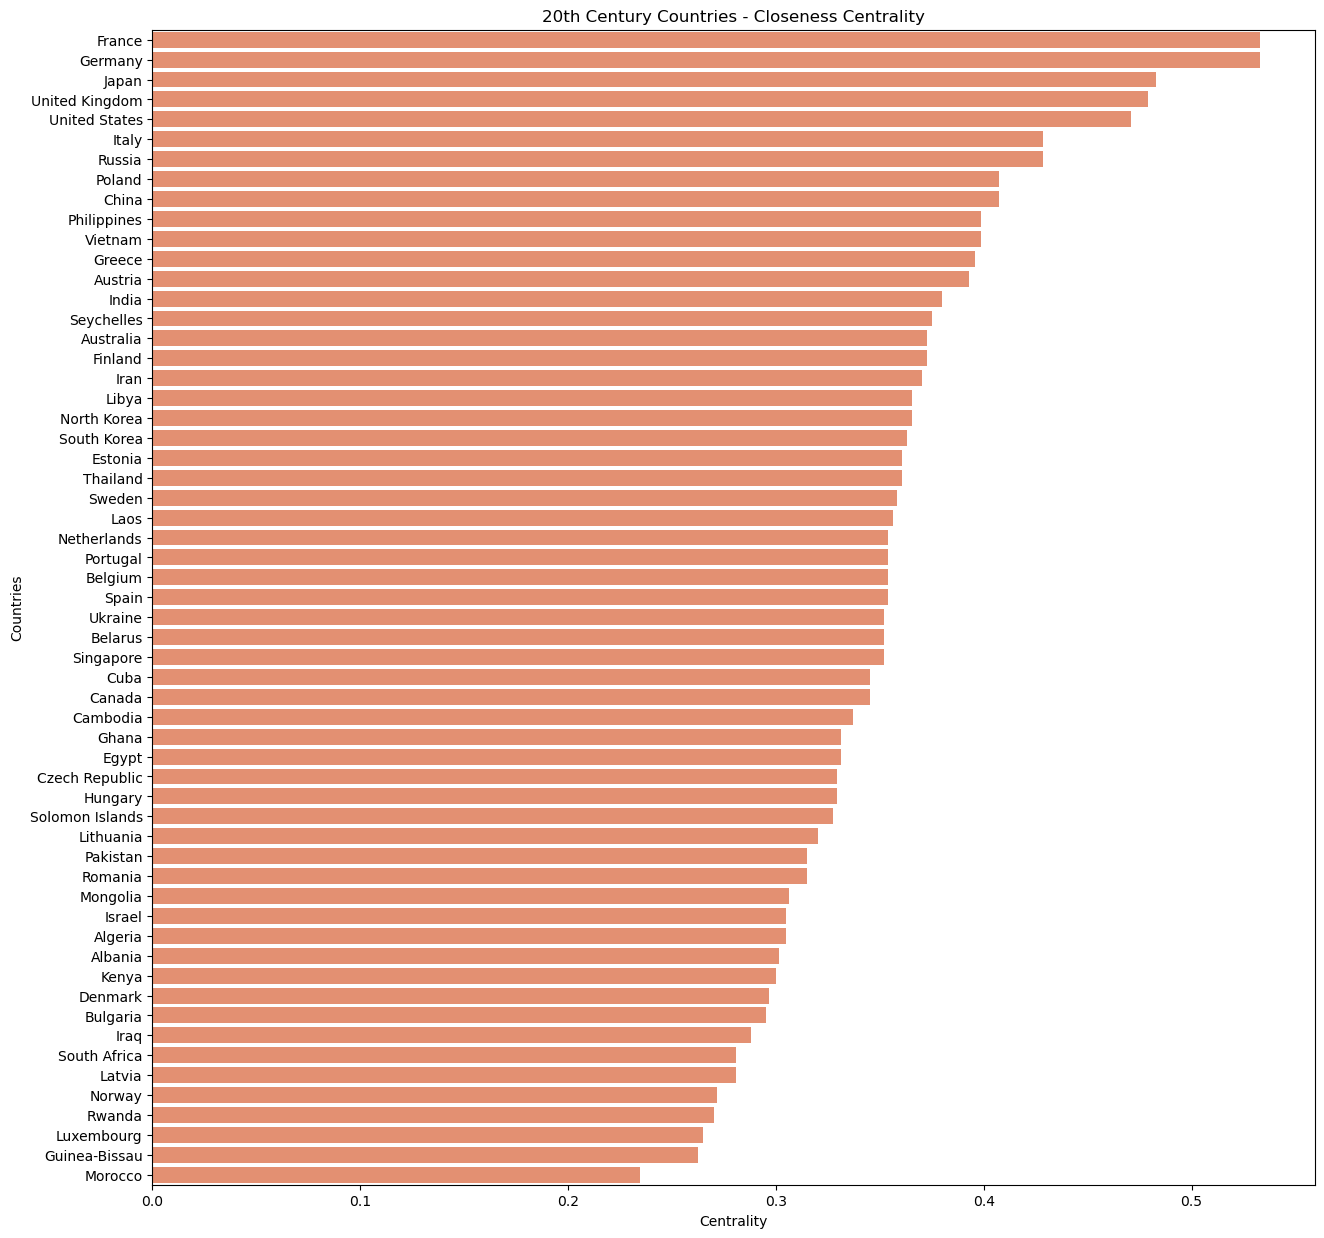

In [14]:
# Plotting the closeness centrality
plt.figure(figsize=(15, 15))
with sns.color_palette('flare'):
    sns.barplot(data=df_closenessC, x='Centrality', y='Countries', saturation=0.9).set_title(
        '20th Century Countries - Closeness Centrality')

The results show that most countries are inter-connected based on the number of edges that link to the 4 countries of the epicenter of the conflict: France, Germany, Japan and United Kingdom. The others are connected to the United States which played a key role in the 20th century industrial and technological advancements. This coincides with the events described in the article.

## Betweenness Centrality

In [15]:
# Creating a betweenness centrality data frame
betweenness_dict = nx.betweenness_centrality(G)
df_betweennessC = pd.DataFrame(betweenness_dict.items(), columns=['Countries', 'Centrality'])
df_betweennessC.sort_values(by=['Centrality'], ascending=False, inplace=True)
df_betweennessC.head()

,Countries,Centrality
4,Germany,0.384435
1,France,0.274408
7,United Kingdom,0.181349
6,United States,0.145813
29,Japan,0.139974


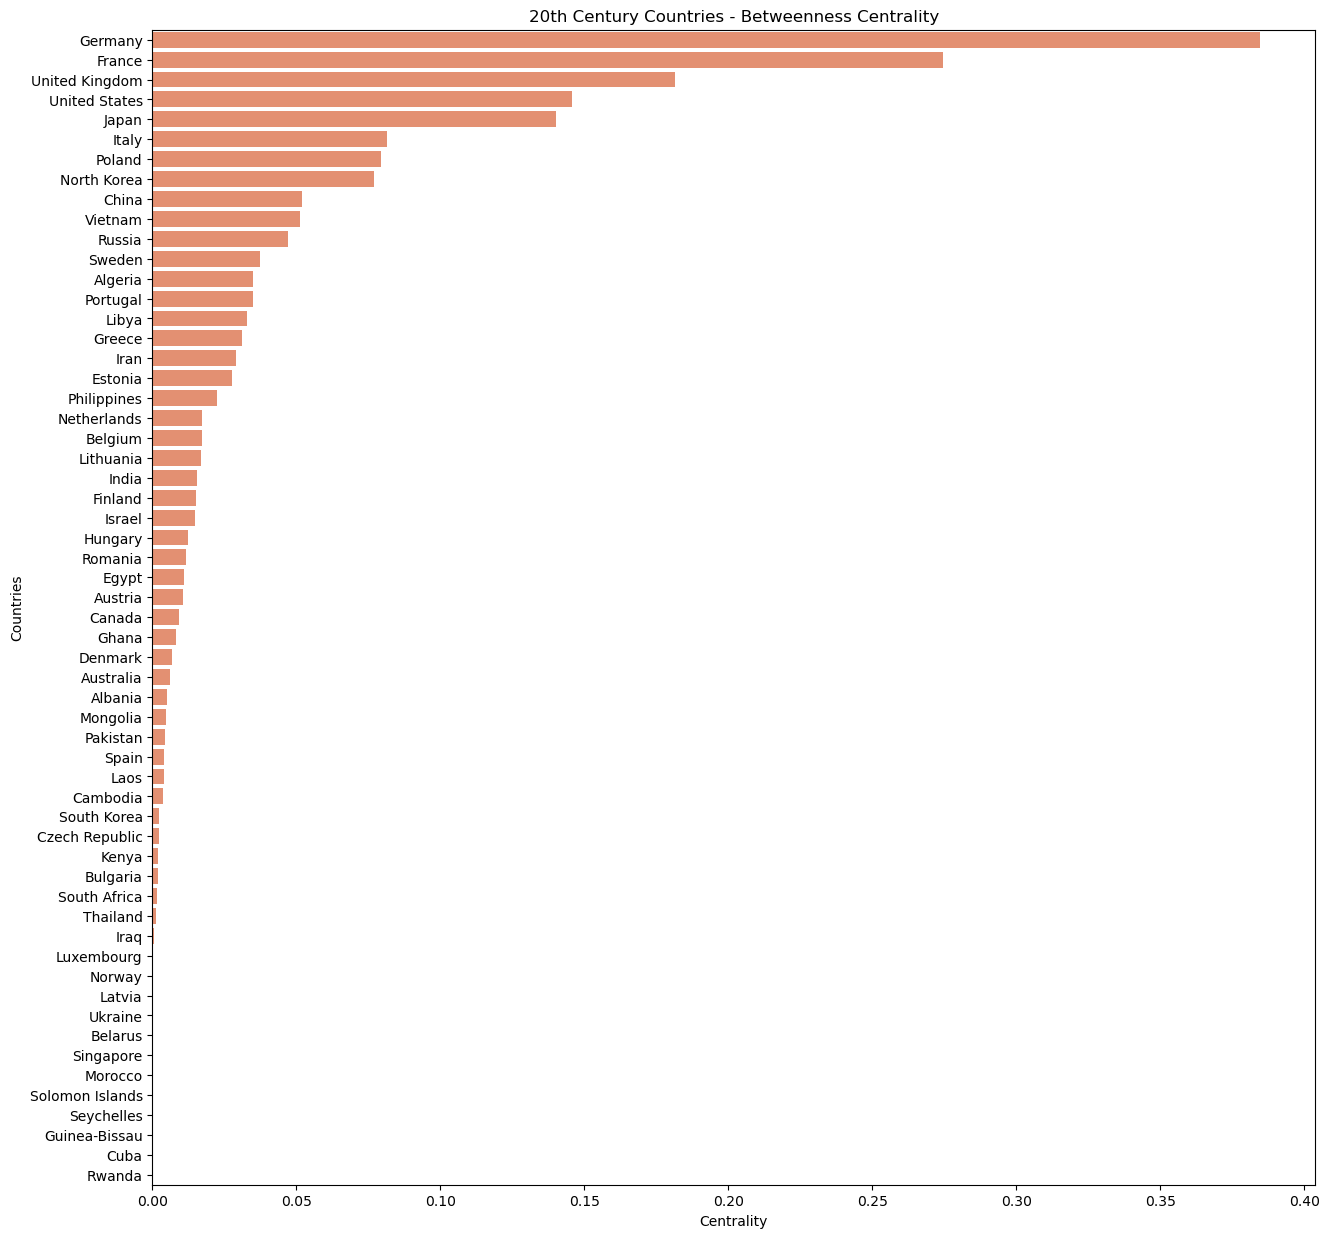

In [16]:
# Plotting the betweenness centrality
plt.figure(figsize=(15, 15))
with sns.color_palette('flare'):
    sns.barplot(data=df_betweennessC, x='Centrality', y='Countries', saturation=0.9).set_title(
        '20th Century Countries - Betweenness Centrality')

This last chart confirms that the most influential countries were Germany, France and United Kingdom as these were the ones that per the narrative interacted the most with other countries becoming the bridge between those countries involved in the events described in the article.

# Saving the Centrality Measures

In [17]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')